# ME 454 Homework 6
## By: Christopher Tsai

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy import integrate
import random
np.set_printoptions(threshold=10)

Problem 1:

In [3]:
N = 1000
T = 10
Q = np.array([[2, 0], [0, 0.1]])
R = np.array([[0.1]])
P1 = np.array([[1, 0], [0, 0.01]])   
A = np.array([[0, 1], [-1.6, -0.4]])
B = np.array([[0], [1]])
x0 = np.array([[10], [0]])

def x_bar_ode(t, r):    
    x1 = r[0, :]
    x2 = r[1, :]
    p1 = r[2, :]
    p2 = r[3, :]

    mat_top = np.concatenate((A, (-B@np.linalg.inv(R)@B.T)), axis=1)
    mat_bot = np.concatenate((-Q, -A.T), axis=1)
    mat = np.concatenate((mat_top, mat_bot), axis=0)
    x1dot = (mat@np.vstack([x1,x2,p1,p2]))[0]
    x2dot = (mat@np.vstack([x1,x2,p1,p2]))[1]
    p1dot = (mat@np.vstack([x1,x2,p1,p2]))[2]
    p2dot = (mat@np.vstack([x1,x2,p1,p2]))[3]
    
    return np.vstack([x1dot, x2dot, p1dot, p2dot])

def bc(ya, yb):
    pT = np.dot(yb[0:2], P1).flatten()  
    return np.array([ya[0] - x0[0], ya[1] - x0[1], yb[2] - pT[0], yb[3] - pT[1]]).flatten()

initial_guess = np.zeros((4, N))

x_bar_sol = integrate.solve_bvp(x_bar_ode, bc, np.linspace(0, T, N), initial_guess)

u = (-np.linalg.inv(R)@B.T@x_bar_sol.y[2:4])[0]

def z_ode(t, z):
    z = z.reshape((2,1))
    v = A_*np.sin(B_*t + C_) + D_
    zdot = A@z + B@np.array([[v]])
    return zdot.flatten()

z_mat = np.zeros((20, N))
v_mat = np.zeros((10, N))

for i in range(10):
    A_ = random.randint(1,10)
    B_ = random.randint(1,10)
    C_ = random.randint(1,10)
    D_ = random.randint(1,10)
    
    v_mat[i, :] = np.array([A_*np.sin(B_*t + C_) + D_ for t in np.linspace(0, T, N)])
    
    z_sol_i = integrate.solve_ivp(z_ode, [0, T], [0, 0], t_eval=np.linspace(0, T, N))
    z_mat[2*i:2*i + 2, :] = z_sol_i.y
    
DJ_list = []
dt = T/(N-1)

for i in range(10):
    DJ_i = 0
    for j in range(N):
        DJ_i += (np.dot((2*Q@x_bar_sol.y[0:2, j].reshape(2,1)).flatten(), z_mat[2*i:2*i + 2, j].flatten()) + 2*R*u[j]*v_mat[i, j])*dt
    DJ_i /= 2
    DJ_list.append(DJ_i)
    
    print("Iteration", i, ":\n")
    print("z(t) =", z_mat[2*i:2*i + 2], "\n")
    print("v(t) =", v_mat[i], "\n")
    print("DJ =", DJ_i[0][0], "\n")

Iteration 0 :

z(t) = [[0.00000000e+00 3.85118802e-04 1.53213882e-03 ... 5.48071463e+00
  5.48451350e+00 5.48822214e+00]
 [0.00000000e+00 7.67355672e-02 1.52229566e-01 ... 3.74465568e-01
  3.70545184e-01 3.65204500e-01]] 

v(t) = [7.72959251 7.6343319  7.54499606 ... 8.58065077 8.45020109 8.32363285] 

DJ = -0.12263472320156865 

Iteration 1 :

z(t) = [[ 0.00000000e+00  4.09305854e-04  1.61715500e-03 ...  2.63661445e+00
   2.63559886e+00  2.63576608e+00]
 [ 0.00000000e+00  8.12766931e-02  1.59532595e-01 ... -1.60570169e-01
  -4.22381390e-02  7.56529960e-02]] 

v(t) = [ 8.27008007  8.00198211  7.73298062 ... 15.99015291 15.99873706
 15.99920674] 

DJ = -0.1340065315771143 

Iteration 2 :

z(t) = [[0.00000000e+00 7.06585776e-04 2.83632643e-03 ... 4.76312464e+00
  4.76513624e+00 4.76785947e+00]
 [0.00000000e+00 1.41437582e-01 2.84306218e-01 ... 1.64999681e-01
  2.36735742e-01 3.07128093e-01]] 

v(t) = [14.04882591 14.26340487 14.45215205 ... 14.9093748  14.82213832
 14.70632792] 

DJ = -0

Problem 2:

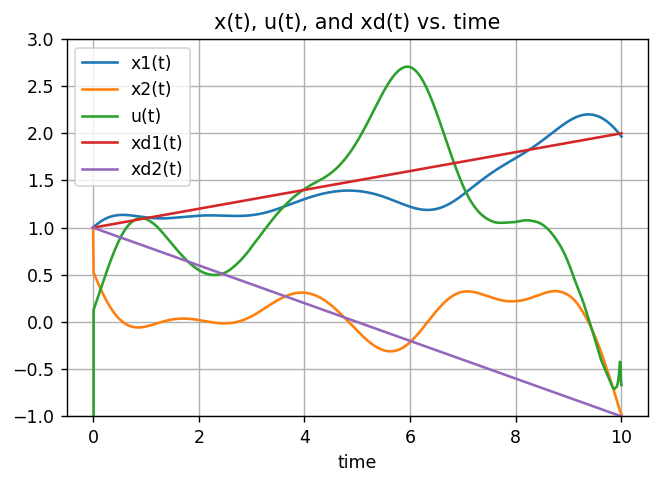

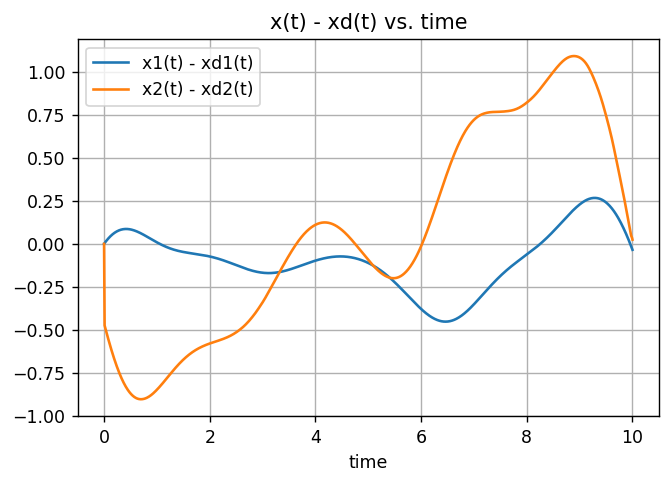

In [6]:
Q = [np.array([[10, 0], [0, 1 + 1/8*np.sin(t)]]) for t in np.linspace(0, T, N + 1)]
R = np.array([[1]])
P1 = np.array([[100, 0], [0, 100]])   
A = [np.array([[0, 1 + 1/2*np.sin(t)], [-1 - 1/2*np.cos(t), 1/4*np.sin(t)]]) for t in np.linspace(0, T, N + 1)]
B = [np.array([[0], [1 + 1/2*np.sin(t)]]) for t in np.linspace(0, T, N + 1)]
x0 = np.array([[1], [1]])
xd = [np.array([[0.1*t + 1], [-0.2*t + 1]]) for t in np.linspace(0, T, N + 1)]
r1 = -P1@xd[-1]

def P_r_ode(t, P_r):
    P = P_r[0:4].reshape((2, 2))
    r = P_r[4:6].reshape((2, 1))
    i = int(round(N*t/T))
    Pdot = -P@A[i] - A[i].T@P + P@B[i]@np.linalg.inv(R)@B[i].T@P - Q[i]
    rdot = -A[i].T@r + Q[i]@xd[i] + P@B[i]@np.linalg.inv(R)@B[i].T@r   
    return np.concatenate((Pdot.flatten(), rdot.flatten()))

P_r_sol = integrate.solve_ivp(P_r_ode, [T, 0], np.concatenate((P1.flatten(), r1.flatten())), t_eval=np.linspace(T, 0, N))

P_r = np.flip(P_r_sol.y, 1)

def x_ode(t, x):
    x = x.reshape((2, 1))
    i = int(round(N*t/T))
    P_i = np.reshape(P_r[0:4, i-1], (2, 2))
    r_i = np.reshape(P_r[4:6, i-1], (2, 1))
    xdot = A[i-1]@x - B[i-1]@np.linalg.inv(R)@B[i-1].T@(P_i@x + r_i)
    return xdot.flatten()

x_sol = integrate.solve_ivp(x_ode, [0, T], x0.flatten(), t_eval=np.linspace(0, T, N))

u = np.zeros(N)

for i in range(N):
    P_i = np.reshape(P_r[0:4, i-1], (2,2))
    r_i = np.reshape(P_r[4:6, i-1], (2,1))   
    u[i] = -np.linalg.inv(R)@B[i].T@(P_i@x_sol.y[:,i].reshape((2,1)) + r_i)
    
xd1 = np.array([0.1*t + 1 for t in np.linspace(0, T, N)])
xd2 = np.array([-0.2*t + 1 for t in np.linspace(0, T, N)])

plt.figure(dpi=125, facecolor='w')
plt.plot(np.linspace(0, T, N), x_sol.y[0], label='x1(t)')
plt.plot(np.linspace(0, T, N), x_sol.y[1], label='x2(t)')
plt.plot(np.linspace(0, T, N), u, label='u(t)')
plt.plot(np.linspace(0, T, N), xd1, label='xd1(t)')
plt.plot(np.linspace(0, T, N), xd2, label='xd2(t)')
plt.ylim(-1, 3)
plt.legend()
plt.xlabel('time')
plt.grid(True)
plt.title("x(t), u(t), and xd(t) vs. time")
plt.show()

plt.figure(dpi=125, facecolor='w')
plt.plot(np.linspace(0, T, N), x_sol.y[0] - xd1, label='x1(t) - xd1(t)')
plt.plot(np.linspace(0, T, N), x_sol.y[1] - xd2, label='x2(t) - xd2(t)')
plt.legend()
plt.xlabel('time')
plt.grid(True)
plt.title("x(t) - xd(t) vs. time")
plt.show()

Problem 3:

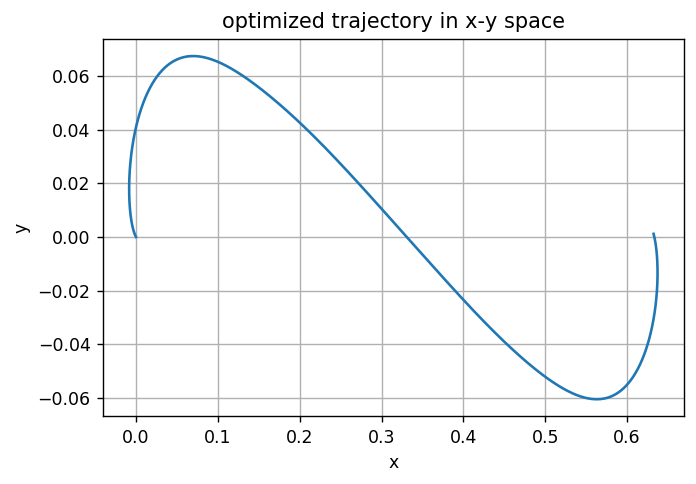

In [7]:
T = 1
Q = np.array([[1000, 0, 0], [0, 50, 0], [0, 0, 1]])
R = np.array([[50, 0], [0, 0.1]])
P1 = np.array([[10000, 0, 0], [0, 10000, 0], [0, 0, 10]])   
x0 = np.array([[0], [0], [np.pi/2]])
xd_T = np.array([[4*T/(2*np.pi)], [0], [np.pi/2]])
r1 = -P1@xd_T

def x_p_ode(t, x_p):  
    N_ode = x_p.shape[1]
    x_p_dot = np.zeros((6, N_ode))
    xd = [np.array([[4*t/(2*np.pi)], [0], [np.pi/2]]) for t in np.linspace(0, T, N_ode + 1)]
    for i in range(N_ode):
        x = x_p[0:3, i].reshape((3, 1))
        p = x_p[3:6, i].reshape((3, 1))
        B = np.array([[np.cos(x[2][0]), 0], [np.sin(x[2][0]), 0], [0, 1]])
        u = -np.linalg.inv(R)@B.T@p
        A = np.array([[0, 0, -np.sin(x[2][0])*u[0]], [0, 0, np.cos(x[2][0])*u[0]], [0, 0, 0]])
        xdot = A@x + B@u
        pdot = -Q@x - A.T@p + Q@xd[i]
        x_p_dot[0, i]  = xdot[0, 0]
        x_p_dot[1, i]  = xdot[1, 0]
        x_p_dot[2, i]  = xdot[2, 0]
        x_p_dot[3, i]  = pdot[0, 0]
        x_p_dot[4, i]  = pdot[1, 0]
        x_p_dot[5, i]  = pdot[2, 0]
    return x_p_dot

def bc(ya, yb):
    pT = ((yb[0:3]@P1).reshape((3, 1)) + r1).flatten()
    return np.array([ya[0] - x0[0], ya[1] - x0[1], ya[2] - x0[2], yb[3] - pT[0], yb[4] - pT[1], yb[5] - pT[2]])

initial_guess = np.zeros((6, N))
x_p_sol = integrate.solve_bvp(x_p_ode, bc, np.linspace(0, T, N), initial_guess, max_nodes = 1000, tol = 0.1)

plt.figure(dpi=125, facecolor='w')
plt.plot(x_p_sol.y[0], x_p_sol.y[1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title("optimized trajectory in x-y space")
plt.show()